## Observations and Insights 

# Key Findings

- Based on assessment of one mouse treated with Capomulin, the tumor showed significant decline in size over the measurement period.

- There is a strong positive correlation (based on the strong r-value) between a mouse's weight and the size of the tumor when treated with Capomulin.  The more the mouse weighs, the larger in volume its tumor (as measured during the latest timepoint), therefore deeming the drug less effective.  

- Ramicane had the lowest variance in data among its mice and based on the box plots and data output.  It has a similar efficacy on mouse tumors as Capomulin.  Based on the same information, Infubinol and Ceftamine were not as effective. Overall, with only one outlier in the data, the overall results are consistent and useful in assessing the efficacy of the treatments tested. 


In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(249)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
244,g288,Capomulin,Male,3,19,45,37.074024,1
245,i334,Ramicane,Female,8,20,0,45.000000,0
246,i334,Ramicane,Female,8,20,5,41.020518,0
247,i334,Ramicane,Female,8,20,10,41.631247,0


In [48]:
# Checking the total number of mice.
total_mice = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df = pd.DataFrame({
    "Number of Mice":[total_mice]})
total_mice_df


,Number of Mice
0,249


In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint and show 
# all data for that ID, search by iD and get all rows showing for this ID
# highlighting only the first duplicate

merge_df[["Mouse ID","Timepoint"]]
duplicate_rows = merge_df[merge_df.duplicated()]
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merge_df[merge_df["Mouse ID"]=="g989"]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get names of indexes for which column Mouse ID has value g989
mice_index = merge_df[merge_df["Mouse ID"]=="g989"].index
merge_df.drop(mice_index, inplace=True)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df_clean = pd.DataFrame({
    "Number of Mice Clean":[total_mice_clean]})
total_mice_df_clean


,Number of Mice Clean
0,248


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Set variables below for new dataframe
tumor_mean = merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Create new dataframe for values created 
regime_overview = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Std Dev":tumor_std, "SEM":tumor_SEM})
regime_overview




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen using the aggregation method, produce the same 
# summary statistics in a single line
tumor_aggregate = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_aggregate




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

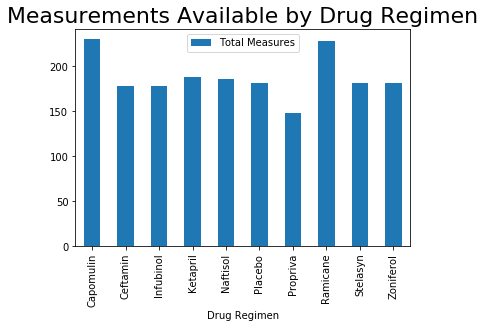

In [55]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using pandas. 

total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
total_meas_df = pd.DataFrame({"Total Measures":total_meas})

total_meas_df.plot(kind='bar')
plt.title("Measurements Available by Drug Regimen", fontsize=22)
plt.show()


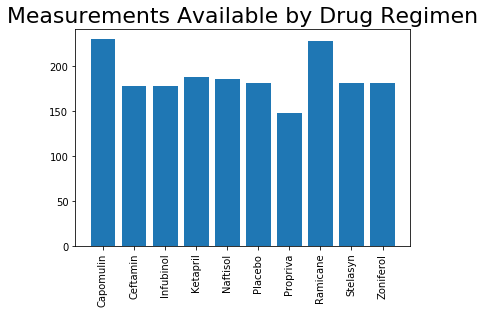

In [56]:
# Generate a bar plot showing the total number of measurements taken 
# on each drug regimen using pandas. 

total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
total_meas_df = pd.DataFrame({"Total Measures":total_meas})

# Create a list indicating where to write x labels and set figure size to 
# adjust for space
plt.bar(total_meas_df.index.values,total_meas_df["Total Measures"], align = "center")
plt.xticks(rotation = "vertical")
plt.title("Measurements Available by Drug Regimen", fontsize=22)
plt.show()


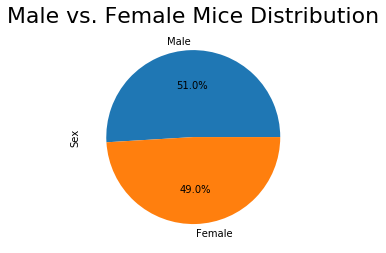

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = merge_df["Sex"].value_counts()
gender_dist.plot(kind = "pie",autopct="%1.1f%%")
plt.title("Male vs. Female Mice Distribution", fontsize=22)
plt.show()


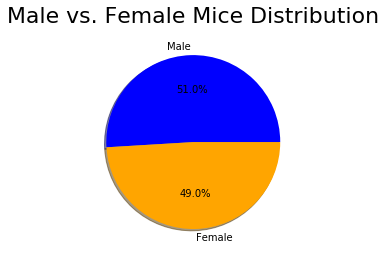

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.title("Male vs. Female Mice Distribution", y=1.02, fontsize=22);
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint = merge_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
new_merge_df = pd.merge(latest_timepoint,merge_df ,on=["Mouse ID","Timepoint"])
new_merge_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [60]:
# Put treatments into a list for for loop (first to calculate the final tumor volume of each mouse across
# the four treatment regiments and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list: 
    drug_volume = new_merge_df.loc[new_merge_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(drug_volume)
    
    # outlier formula should be here 
    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print("----------")
    print(f"For {x}, the lower quartile of tumor volume is: {lowerq}")
    print(f"For {x}, the upper quartile of tumor volume is: {upperq}")
    print(f"For {x}, the interquartile range of tumor volumes is: {iqr}")
    print(f"For {x}, the the median of tumor volumes is: {quartiles[0.5]} ")
      
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = drug_volume.loc[(drug_volume<lower_bound)|(drug_volume>upper_bound)].count()
    print("Drug Regimen "+ x + " has " + str(outlier) + " outliers.")

----------
For Capomulin, the lower quartile of tumor volume is: 32.37735684
For Capomulin, the upper quartile of tumor volume is: 40.1592203
For Capomulin, the interquartile range of tumor volumes is: 7.781863460000004
For Capomulin, the the median of tumor volumes is: 38.125164399999996 
Drug Regimen Capomulin has 0 outliers.
----------
For Ramicane, the lower quartile of tumor volume is: 31.56046955
For Ramicane, the upper quartile of tumor volume is: 40.65900627
For Ramicane, the interquartile range of tumor volumes is: 9.098536719999998
For Ramicane, the the median of tumor volumes is: 36.56165229 
Drug Regimen Ramicane has 0 outliers.
----------
For Infubinol, the lower quartile of tumor volume is: 54.04860769
For Infubinol, the upper quartile of tumor volume is: 65.52574285
For Infubinol, the interquartile range of tumor volumes is: 11.477135160000003
For Infubinol, the the median of tumor volumes is: 60.16518046 
Drug Regimen Infubinol has 1 outliers.
----------
For Ceftamin, t

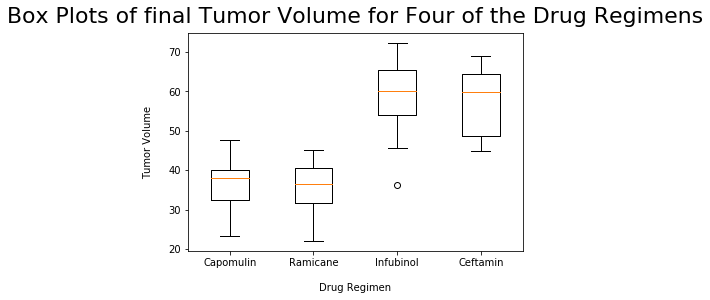

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume)
plt.xlabel("Drug Regimen", labelpad=15)
plt.ylabel("Tumor Volume", labelpad=15)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title("Box Plots of final Tumor Volume for Four of the Drug Regimens", y=1.02, fontsize=22);
plt.show()

## Line and Scatter Plots

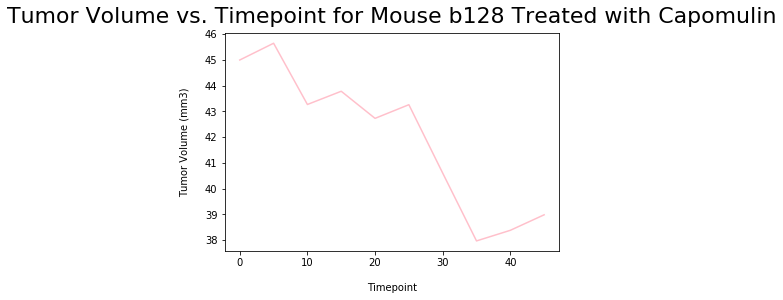

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"] 
mouse = cap_df.loc[cap_df["Mouse ID"] == "b128"]
x = mouse["Timepoint"]
y = mouse["Tumor Volume (mm3)"]
plt.plot(x,y, color="pink")
plt.xlabel("Timepoint", labelpad=15)
plt.ylabel("Tumor Volume (mm3)", labelpad=15)
plt.title("Tumor Volume vs. Timepoint for Mouse b128 Treated with Capomulin", y=1.02, fontsize=22);
plt.show()


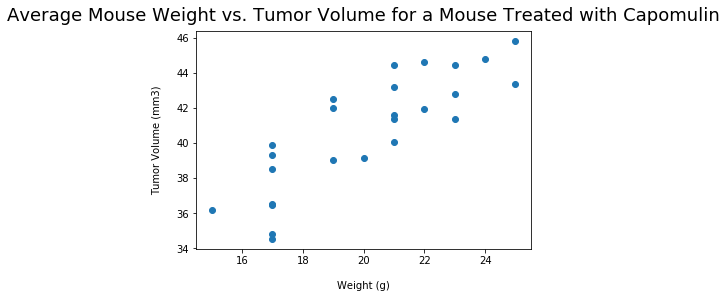

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)", labelpad=15)
plt.ylabel("Tumor Volume (mm3)", labelpad=15)
plt.title("Average Mouse Weight vs. Tumor Volume for a Mouse Treated with Capomulin", y=1.02, fontsize=18);

plt.show()

## Correlation and Regression

y = 0.95x + 21.55
The R value (i.e. Coefficient of Correlation) is: 0.8419363424694718
The R squared value (i.e. Coefficient of Determination) is: 0.7088568047708717


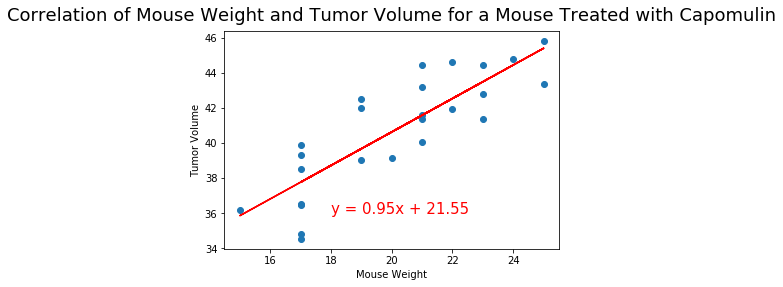

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = cap_avg["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title("Correlation of Mouse Weight and Tumor Volume for a Mouse Treated with Capomulin", y=1.02, fontsize=18);
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The R value (i.e. Coefficient of Correlation) is: {rvalue}")
print(f"The R squared value (i.e. Coefficient of Determination) is: {rvalue**2}")
plt.show()